<a href="https://colab.research.google.com/github/panghanwu/neural_network_python/blob/main/MLP_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

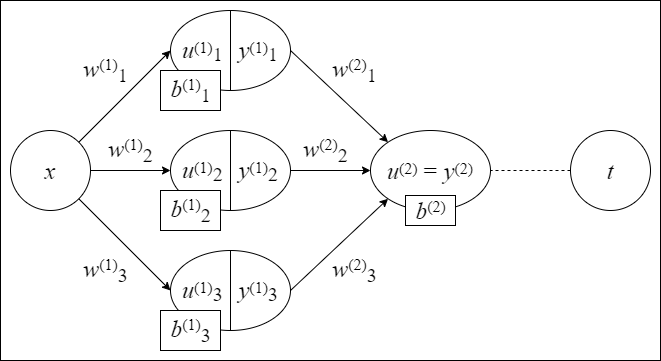

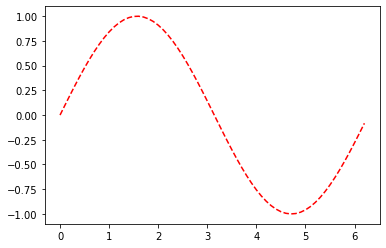

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""Data"""
x = np.arange(0, np.pi*2, 0.1)  # input data
t = np.sin(x)  # correct answer

plt.plot(x, t, 'r--')

In [2]:
batch_size = len(x)
wb_shrinker = 0.01 #  initialize
eta = 0.1  # learning rate

In [3]:
"""Initial Values"""

w1 = wb_shrinker * np.random.randn(1,3)
b1 = wb_shrinker * np.random.randn(3)
w2 = wb_shrinker * np.random.randn(3,1)
b2 = wb_shrinker * np.random.randn(1)

print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 = [[ 0.0011234  -0.00128915 -0.0214622 ]] 

b1 = [ 0.01457167  0.00323495 -0.00241102] 

w2 = [[ 0.0092068 ]
 [-0.01474925]
 [-0.00598713]] 

b2 = [0.00157504] 



In [4]:
"""Forward Propagation of Middle Layer"""
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))

print('u1:', u1[:6,:], '\n...\n')
print('y1:', y1[:6,:], '\n...\n')

u1: [[ 0.01457167  0.00323495 -0.00241102]
 [ 0.01468401  0.00310603 -0.00455724]
 [ 0.01479635  0.00297712 -0.00670346]
 [ 0.01490869  0.0028482  -0.00884968]
 [ 0.01502103  0.00271929 -0.0109959 ]
 [ 0.01513337  0.00259037 -0.01314212]] 
...

y1: [[0.50364285 0.50080874 0.49939725]
 [0.50367094 0.50077651 0.49886069]
 [0.50369902 0.50074428 0.49832414]
 [0.5037271  0.50071205 0.4977876 ]
 [0.50375519 0.50067982 0.49725105]
 [0.50378327 0.50064759 0.49671452]] 
...



y2: [[-0.00416453]
 [-0.00416058]
 [-0.00415663]
 [-0.00415269]
 [-0.00414874]
 [-0.0041448 ]] 
...

loss: 1979.2744398612576


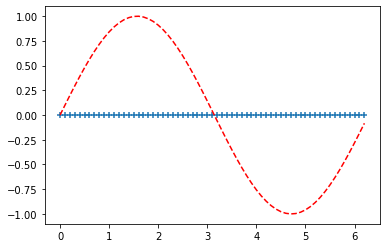

In [5]:
"""Forward Propagation of Output Layer"""
y2 = np.dot(y1, w2) + b2
loss = np.sum((y2-t)**2)

print('y2:', y2[:6,:], '\n...\n')
print('loss:', loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2.reshape(-1), marker='+')


In [6]:
"""Backpropagation of Output Layer"""
delta2 = y2 - t.reshape(-1,1)
grad_w2 = np.dot(y1.T, delta2)
grad_b2 = np.sum(delta2, axis=0)

print('delta2 =', delta2[:6], '\n...\n')
print('grad_w2 =', grad_w2, '\n')
print('grad_b2 =', grad_b2, '\n')

delta2 = [[-0.00416453]
 [-0.103994  ]
 [-0.20282597]
 [-0.29967289]
 [-0.39356708]
 [-0.48357033]] 
...

grad_w2 = [[-0.10731343]
 [-0.1440299 ]
 [-0.45611752]] 

grad_b2 = [-0.24766859] 



In [7]:
"""Backpropagation of Middle Layer"""
grad_y1 = np.dot(delta2, w2.T)
delta1 = grad_y1 * (1-y1) * y1
grad_w1 = np.dot(x.reshape(-1,1).T, delta1)
grad_b1 = np.sum(delta1, axis=0)

print('grad_y1 =', grad_y1[:6,:], '\n...\n')
print('delta1 =', delta1[:6], '\n...\n')
print('grad_w1 =', grad_w1, '\n')
print('grad_b1 =', grad_b1, '\n')

grad_y1 = [[-3.83419736e-05  6.14236443e-05  2.49335845e-05]
 [-9.57452040e-04  1.53383324e-03  6.22626043e-04]
 [-1.86737830e-03  2.99153042e-03  1.21434632e-03]
 [-2.75902871e-03  4.41994978e-03  1.79418191e-03]
 [-3.62349382e-03  5.80481845e-03  2.35633904e-03]
 [-4.45213584e-03  7.13229869e-03  2.89520060e-03]] 
...

delta1 = [[-9.58498459e-06  1.53558709e-05  6.23338706e-06]
 [-2.39350108e-04  3.83457385e-04  1.55655703e-04]
 [-4.66819024e-04  7.47880948e-04  3.03583169e-04]
 [-6.89718850e-04  1.10498520e-03  4.48536694e-04]
 [-9.05822360e-04  1.45120193e-03  5.89066954e-04]
 [-1.11297024e-03  1.78307168e-03  7.23768897e-04]] 
...

grad_w1 = [[ 0.14278569 -0.22876754 -0.0924891 ]] 

grad_b1 = [-0.00057148  0.00091335  0.00044043] 



In [8]:
"""Update Weights and Biases"""
print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 -= eta * grad_w1
b1 -= eta * grad_b1
w2 -= eta * grad_w2
b2 -= eta * grad_b2

print('------Updated------\n')
print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 = [[ 0.0011234  -0.00128915 -0.0214622 ]] 

b1 = [ 0.01457167  0.00323495 -0.00241102] 

w2 = [[ 0.0092068 ]
 [-0.01474925]
 [-0.00598713]] 

b2 = [0.00157504] 

------Updated------

w1 = [[-0.01315517  0.02158761 -0.01221329]] 

b1 = [ 0.01462882  0.00314361 -0.00245506] 

w2 = [[ 0.01993814]
 [-0.00034626]
 [ 0.03962462]] 

b2 = [0.0263419] 



loss: 1991.4502995224984


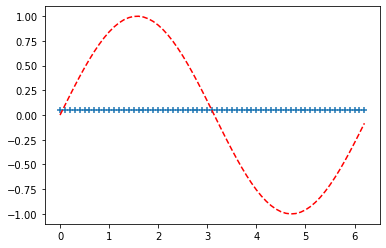

In [9]:
"""Forward Propagation"""
# middle
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
# output
y2 = np.dot(y1, w2) + b2
loss = np.sum((y2-t)**2)

print('loss:', loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2.reshape(-1), marker='+')

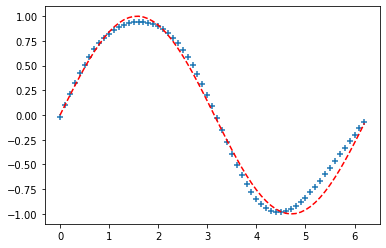

In [10]:
"""Training with single data"""
epoch = 1000
for i in range(epoch):
  for j in range(len(x)):

    # forward propagation
    u1 = np.dot(x[j].reshape(-1,1), w1) + b1
    y1 = 1/(1+np.exp(-u1))
    y2 = np.dot(y1, w2) + b2

    # backward propagation
    delta2 = y2 - t[j].reshape(-1,1)
    grad_w2 = np.dot(y1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_y1 = np.dot(delta2, w2.T)
    delta1 = grad_y1 * (1-y1) * y1
    grad_w1 = np.dot(x[j].reshape(-1,1).T, delta1)
    grad_b1 = np.sum(delta1, axis=0)
    # update
    w1 -= eta * grad_w1
    b1 -= eta * grad_b1
    w2 -= eta * grad_w2
    b2 -= eta * grad_b2

    
# forward propagation
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

# plot
plt.plot(x, t, 'r--')
plt.scatter(x, y2.reshape(-1), marker='+')

## Model in Formula
$ 
f(x) = w^{(2)}_{1} \sigma (w^{(1)}_{1}x + b^{(1)}_{1}) + 
w^{(2)}_{2} \sigma (w^{(1)}_{2}x + b^{(1)}_{2}) +
w^{(2)}_{2} \sigma (w^{(1)}_{2}x + b^{(1)}_{2}) + b^{(2)}
$  
  
$\sigma(x) = \dfrac{1}{1+e^{-x}}$

In [11]:
print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 = [[-0.91621205 -1.95482753 -1.7265432 ]] 

b1 = [ 4.6424405  -0.21772152  5.85236263] 

w2 = [[-3.81139426]
 [-2.44379946]
 [ 3.96221721]] 

b2 = [0.89733184] 



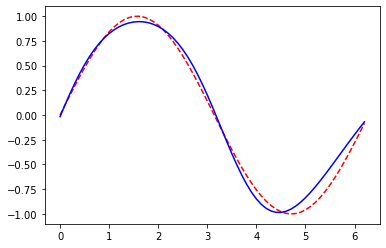

In [12]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

def model(x):
  global w1, b1, w2, b2
  y1 = sigmoid(w1[0,0]*x + b1[0])
  y2 = sigmoid(w1[0,1]*x + b1[1])
  y3 = sigmoid(w1[0,2]*x + b1[2])
  z = w2[0,0]*y1 + w2[1,0]*y2 + w2[2,0]*y3 + b2[0]
  return z

plt.plot(x, t, 'r--')
plt.plot(x, model(x), 'b-')
